In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings # To ignore any warnings warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

C:\Users\prash\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing dataset


In [2]:
stroke_df=pd.read_csv("C:\\Users\\prash\\Downloads\\archive (13)\\healthcare-dataset-stroke-data.csv")

In [3]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Dropping unnecessary columns

In [4]:
#Drop the 'id' column as it is irrelevant in the prediction
stroke_df = stroke_df.drop('id', axis=1)

In [5]:
stroke_df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Missing values

# There are "Unknown" values in the smoking_status cloumn. We will treat them as missing values.

In [6]:
stroke_df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [7]:
stroke_df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

# Filling missing values

In [8]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(), inplace=True)
stroke_df['smoking_status'].fillna(stroke_df['smoking_status'].mode()[0], inplace = True)

In [9]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Using Label Encoder

We will encode target labels with values between 0 and n_classes-1.

To convert kind of categorical text data into model-understandable numerical data, we use the Label Encoder class.

In [10]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [11]:
for col in stroke_df.columns:
    stroke_df[str(col)] = label_encoded(stroke_df[str(col)])

gender ['Female' 'Male' 'Other']
age [8.00e-02 1.60e-01 2.40e-01 3.20e-01 4.00e-01 4.80e-01 5.60e-01 6.40e-01
 7.20e-01 8.00e-01 8.80e-01 1.00e+00 1.08e+00 1.16e+00 1.24e+00 1.32e+00
 1.40e+00 1.48e+00 1.56e+00 1.64e+00 1.72e+00 1.80e+00 1.88e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01
 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01
 1.90e+01 2.00e+01 2.10e+01 2.20e+01 2.30e+01 2.40e+01 2.50e+01 2.60e+01
 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01 3.40e+01
 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01
 4.30e+01 4.40e+01 4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01
 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01 5.60e+01 5.70e+01 5.80e+01
 5.90e+01 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.60e+01
 6.70e+01 6.80e+01 6.90e+01 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01
 7.50e+01 7.60e+01 7.70e+01 7.80e+01 7.90e+01 8.00e+01 8.10e+01 8.20e+01]
hypertension 

In [12]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [13]:
#People who have not had a stroke
stroke_False = stroke_df[stroke_df['stroke'] == 0]

stroke_False.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,24,0,0,0,4,0,1986,53,1,0
250,1,79,1,0,1,2,1,1604,266,1,0
251,0,29,0,0,0,2,1,2663,49,1,0
252,0,91,0,0,1,2,0,528,233,0,0
253,1,35,0,0,0,1,0,3340,64,1,0


In [14]:
print('People who have not had a stroke in percentage-',len(stroke_False)/len(stroke_df)*100,'%')

People who have not had a stroke in percentage- 95.12720156555773 %


In [15]:
#People who have had a stroke
stroke_True = stroke_df[stroke_df['stroke'] == 1]

stroke_True.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


In [16]:
print('People who have had a stroke in percentage-',len(stroke_True)/len(stroke_df)*100,'%')

People who have had a stroke in percentage- 4.87279843444227 %


# Correlation matrix

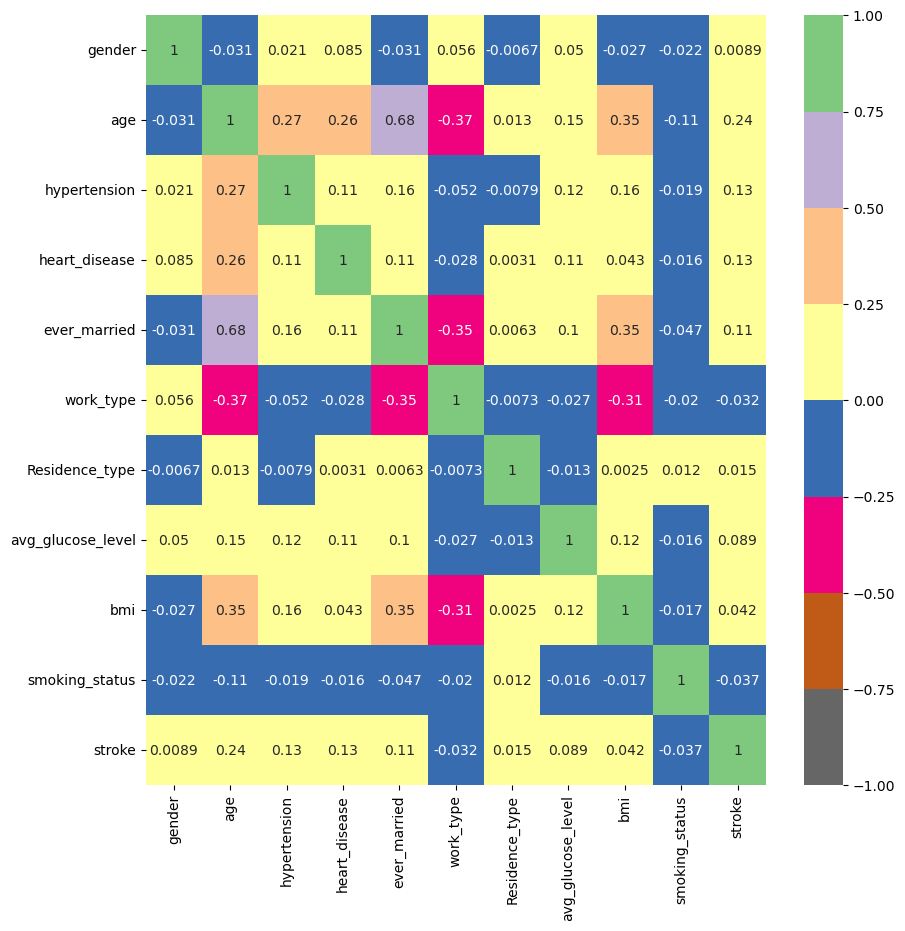

In [17]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(stroke_df.corr(), vmin=-1, cmap='Accent_r', annot=True);

# Pairplot for better visualisation

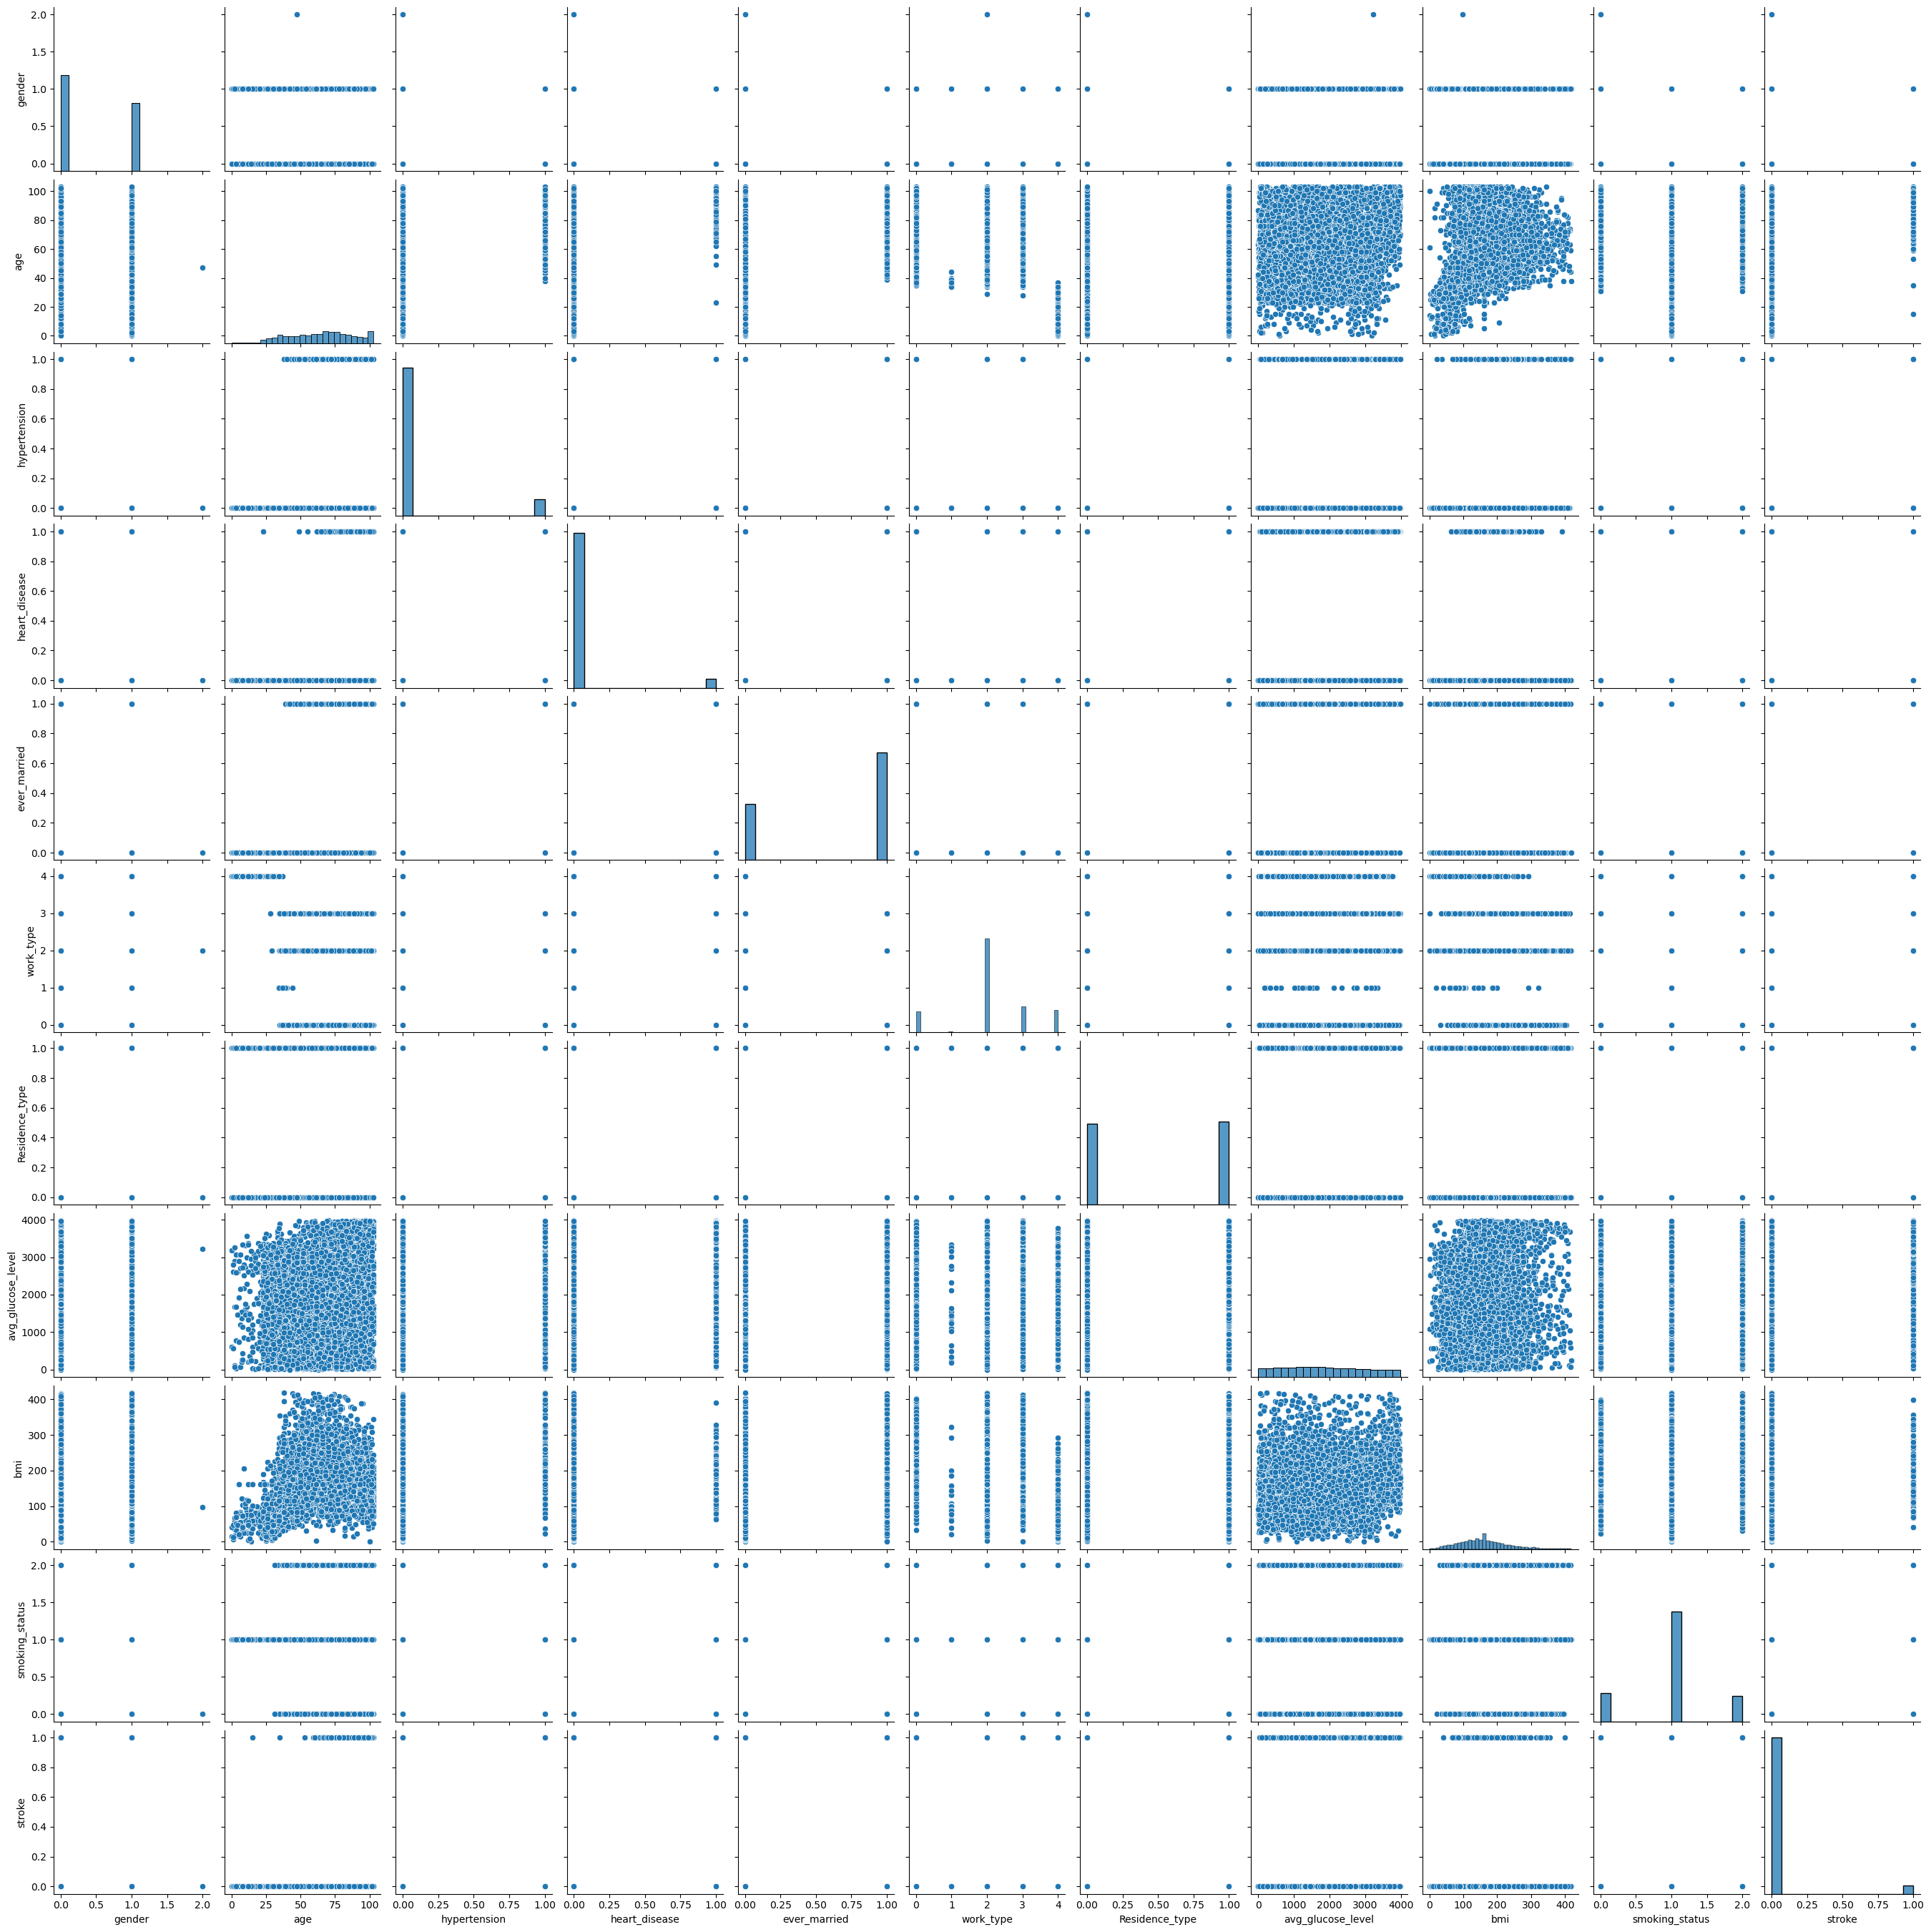

In [18]:
sns.pairplot(stroke_df)

# Training and Testing Data

In [19]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [20]:
#Drop the target label i.e. the stroke column
X = stroke_df.drop(['stroke'],axis =1)

X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,0
1,0,82,0,0,1,3,0,3588,162,1
2,1,101,0,1,1,2,0,2483,199,1
3,0,70,0,0,1,2,1,3385,218,2
4,0,100,1,0,1,3,0,3394,113,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1
5106,0,102,0,0,1,3,1,3030,274,1
5107,0,56,0,0,1,3,0,1314,180,1
5108,1,72,0,0,1,2,0,3363,129,0


In [21]:
#output target class   
y = stroke_df['stroke']

y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [22]:
#Now we need to split trained data and split data i.e. divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# TRAINING DATA using DecisionTreeClassifier

In [23]:
#3577 sample data points for training
X_train.shape
y_train.shape

(3577,)

In [24]:
#1533 samples for testing
X_test.shape
y_test.shape

(1533,)

In [25]:
#Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()   #Instantiate an object out of our class
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

# EVALUATING MODEL

In [26]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
#Plot the confusion matrix for the testing data
y_predict_test = decision_tree.predict(X_test)

y_predict_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
y_test

4894    0
4995    0
3073    0
3323    0
4703    0
       ..
3147    0
1786    0
1308    0
1557    0
389     0
Name: stroke, Length: 1533, dtype: int64

In [29]:
cm = confusion_matrix(y_test, y_predict_test)

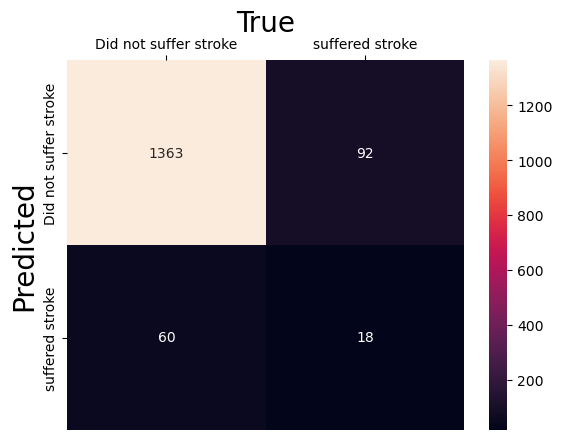

In [30]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

In [31]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1455
           1       0.16      0.23      0.19        78

    accuracy                           0.90      1533
   macro avg       0.56      0.58      0.57      1533
weighted avg       0.92      0.90      0.91      1533

